In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
a_hhold_train = pd.read_csv("data/A_hhold_train.csv", index_col='id')
b_hhold_train = pd.read_csv("data/B_hhold_train.csv", index_col='id')
c_hhold_train = pd.read_csv("data/C_hhold_train.csv", index_col='id')

In [3]:
a_hhold_train.head()

,wBXbHZmp,SlDKnCuu,KAJOWiiw,DsKacCdL,rtPrBBPl,tMJrvvut,jdetlNNF,maLAYXwi,vwpsXRGk,sArDRIyX,...,sDGibZrP,CsGvKKBJ,OLpGAaEu,LrDrWRjC,JCDeZBXq,HGPWuGlV,GDUPaBQs,WuwrCsIY,AlDbXTlZ,country
id,,,,,,,,,,,,,,,,,,,,,
46107,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,XAmOF,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,LPtkN,vkbkA,qQxrL,AITFl,aQeIm,A
82739,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,lwCkE,MwLvg,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
9646,JhtDR,GUusz,BIZns,ZYabk,uxuSS,PHMVg,NDTCU,sehIp,qNABl,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
10975,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,sPNOc,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
16463,JhtDR,alLXR,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,NdlDR,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,UyAms,vkbkA,qQxrL,GAZGl,aQeIm,A


In [4]:
a_hhold_train.tail()

,wBXbHZmp,SlDKnCuu,KAJOWiiw,DsKacCdL,rtPrBBPl,tMJrvvut,jdetlNNF,maLAYXwi,vwpsXRGk,sArDRIyX,...,sDGibZrP,CsGvKKBJ,OLpGAaEu,LrDrWRjC,JCDeZBXq,HGPWuGlV,GDUPaBQs,WuwrCsIY,AlDbXTlZ,country
id,,,,,,,,,,,,,,,,,,,,,
45288,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,PUBDZ,sehIp,vVbnO,MwLvg,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,aQeIm,A
65081,JhtDR,GUusz,BIZns,ZYabk,feupP,PHMVg,NDTCU,cLAGr,hmAUm,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
34370,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,PUBDZ,sehIp,bUhyU,MwLvg,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
12297,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,bUhyU,MwLvg,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
39832,JhtDR,alLXR,BIZns,ZYabk,feupP,PHMVg,NDTCU,sehIp,QRKWz,MwLvg,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A


In [7]:
a_hhold_train.loc[:16463,['country', 'poor']]

,country,poor
id,,
46107,A,False
82739,A,False
9646,A,True
10975,A,True
16463,A,True


In [9]:
a_hhold_train.iloc[:, 2].unique()

array(['TuovO', 'BIZns', 'rqUAG'], dtype=object)

In [10]:
a_hhold_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8203 entries, 46107 to 39832
Columns: 345 entries, wBXbHZmp to country
dtypes: bool(1), float64(2), int64(2), object(340)
memory usage: 21.9+ MB


In [11]:
b_hhold_train.shape

(3255, 442)

In [12]:
c_hhold_train.shape

(6469, 164)

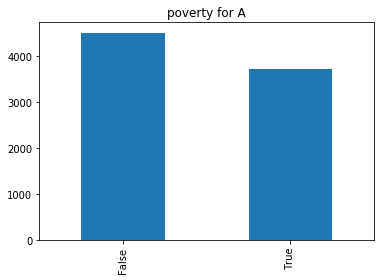

In [13]:
a_hhold_train.poor.value_counts().plot.bar(title="poverty for A")

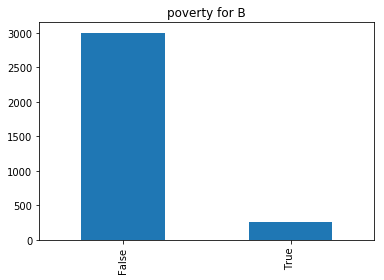

In [14]:
b_hhold_train.poor.value_counts().plot.bar(title="poverty for B")

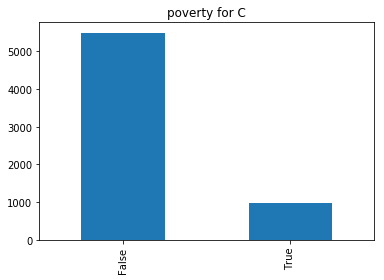

In [15]:
c_hhold_train.poor.value_counts().plot.bar(title="poverty for C")

In [17]:
td = {"a":["edo", "delta", "delta", "edo", "delta", "delta"],
     "b": ["Nigeria", "Ghana", "Ghana", "Ethiopia", "Nigeria", "Nigeria"],
     "c": ["Africa", "Europe", "America", "Oceania", "Asia", "Africa"]}
testdf = pd.DataFrame(td)

In [18]:
testdf

,a,b,c
0,edo,Nigeria,Africa
1,delta,Ghana,Europe
2,delta,Ghana,America
3,edo,Ethiopia,Oceania
4,delta,Nigeria,Asia
5,delta,Nigeria,Africa


In [19]:
pd.get_dummies(testdf)

,a_delta,a_edo,b_Ethiopia,b_Ghana,b_Nigeria,c_Africa,c_America,c_Asia,c_Europe,c_Oceania
0,0,1,0,0,1,1,0,0,0,0
1,1,0,0,1,0,0,0,0,1,0
2,1,0,0,1,0,0,1,0,0,0
3,0,1,1,0,0,0,0,0,0,1
4,1,0,0,0,1,0,0,1,0,0
5,1,0,0,0,1,1,0,0,0,0


In [20]:
b_hhold_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255 entries, 57071 to 4923
Columns: 442 entries, RzaXNcgd to country
dtypes: bool(1), float64(9), int64(14), object(418)
memory usage: 11.0+ MB


In [21]:
def stan(df):
    '''
    Function to standardze dataframe. 
    '''
    numeric = df.select_dtypes(include=["float64", "int64"])
    df[numeric.columns] = (numeric - numeric.mean()) / numeric.std()
    return df

In [22]:
c_hhold_train.select_dtypes(include=["float64", "int64"]).head()

,LhUIIEHQ,PNAiwXUz,jmsRIiqp,NONtAKOM,kLAQgdly,WWuPOkor,CtFxPQPT,GIwNbAsH,qLDzvjiU,detlNNFh,...,kiAJBGqv,aFKPYcDt,gAZloxqF,phbxKGlB,nTaJkLaJ,ZZGQNLOX,snkiwkvf,POJXrpmn,vSqQCatY,mmoCpqWS
id,,,,,,,,,,,,,,,,,,,,,
57211,7,-5,8,-10,-500,5,-8,-3,0,-1,...,1,-9,-9,-605,5,-19,-100,2,196,52
62519,7,331,8,-4,-410,5,-596,-3,0,-1,...,-1,-9,-849,-767,593,-13,-520,2,250,100
11614,9,-1,15,2,-10,5,-8,-6,1,-1,...,0,-9,-39,-677,26,-25,-34,2,7,70
6470,9,-5,1,2,-10,5,-22,-6,-1,-1,...,0,-9,-9,-20,-2,-13,-16,2,175,10
33558,9,23,15,-10,-325,0,-1,-6,0,8,...,2,-9,-1039,-938,-2,-13,-634,2,307,-5


In [23]:
c_stan = stan(c_hhold_train)
c_hhold_train.select_dtypes(include=["float64", "int64"]).head()

,LhUIIEHQ,PNAiwXUz,jmsRIiqp,NONtAKOM,kLAQgdly,WWuPOkor,CtFxPQPT,GIwNbAsH,qLDzvjiU,detlNNFh,...,kiAJBGqv,aFKPYcDt,gAZloxqF,phbxKGlB,nTaJkLaJ,ZZGQNLOX,snkiwkvf,POJXrpmn,vSqQCatY,mmoCpqWS
id,,,,,,,,,,,,,,,,,,,,,
57211,-0.606739,-0.350340,-0.313847,-0.310077,-0.704307,0.524039,0.380397,0.026222,-0.249567,-0.127064,...,0.446025,-0.441867,0.574764,-0.732303,-0.450573,0.069691,0.234067,0.453789,0.335384,0.668694
62519,-0.606739,3.907434,-0.313847,0.249445,-0.390493,0.524039,-3.296468,0.026222,-0.249567,-0.127064,...,-0.202292,-0.441867,-2.670770,-1.111625,3.083029,1.265523,-1.107290,0.453789,0.551538,1.487273
11614,0.742520,-0.299653,0.449989,0.808967,1.004237,0.524039,0.380397,-0.444972,0.541055,-0.127064,...,0.121867,-0.441867,0.458852,-0.900891,-0.324373,-1.126142,0.444852,0.453789,-0.421156,0.975661
6470,0.742520,-0.350340,-1.077683,0.808967,1.004237,0.524039,0.292852,-0.444972,-1.040189,-0.127064,...,0.121867,-0.441867,0.574764,0.637471,-0.492640,1.265523,0.502339,0.453789,0.251324,-0.047563
33558,0.742520,0.004474,0.449989,-0.310077,-0.094113,-1.142633,0.424169,-0.444972,-0.249567,0.184764,...,0.770184,-0.441867,-3.404879,-1.512021,-0.492640,1.265523,-1.471372,0.453789,0.779701,-0.303369


In [24]:
b_hhold_train.select_dtypes(include=["float64", "int64"]).head()

,wJthinfa,ZvEApWrk,vuQrLzvK,FGWqGkmD,qrOrXLPM,BXOWgPgL,umkFMfvA,McFBIGsm,NjDdhqIe,rCVqiShm,...,IrxBnWxE,BRzuVmyf,dnlnKrAg,VyHofjLM,GrLBZowF,oszSdLhD,aAufyreG,cDhZjxaW,OSmfjCbE,IOMvIGQS
id,,,,,,,,,,,,,,,,,,,,,
57071,42,103,67,NaN,16,NaN,NaN,NaN,98,-18,...,NaN,15.0,-15927.0,2,-4,1,66.0,-59,NaN,100
18973,34,-2,92,NaN,16,NaN,NaN,NaN,-7,-38,...,NaN,21.0,NaN,2,-4,1,21.0,-59,NaN,75
20151,34,313,97,NaN,24,NaN,NaN,NaN,308,-10,...,NaN,66.0,NaN,2,-10,1,NaN,1,NaN,150
5730,58,138,-64,NaN,24,150.0,NaN,305.0,133,-48,...,NaN,36.0,NaN,2,-184,1,NaN,-59,-506.0,100
35033,122,68,-54,NaN,24,0.0,NaN,5.0,63,-28,...,NaN,15.0,NaN,2,-244,1,NaN,-39,-6.0,50


In [25]:
b_stan = stan(b_hhold_train)
b_hhold_train.select_dtypes(include=["float64", "int64"]).head()

,wJthinfa,ZvEApWrk,vuQrLzvK,FGWqGkmD,qrOrXLPM,BXOWgPgL,umkFMfvA,McFBIGsm,NjDdhqIe,rCVqiShm,...,IrxBnWxE,BRzuVmyf,dnlnKrAg,VyHofjLM,GrLBZowF,oszSdLhD,aAufyreG,cDhZjxaW,OSmfjCbE,IOMvIGQS
id,,,,,,,,,,,,,,,,,,,,,
57071,-0.060772,0.065928,0.687955,NaN,-0.890950,NaN,NaN,NaN,0.087650,0.569923,...,NaN,-0.736062,0.960203,0.016097,0.761403,0.179591,0.408442,0.235180,NaN,0.339520
18973,-0.412754,-0.928796,1.034898,NaN,-0.890950,NaN,NaN,NaN,-0.891198,0.192433,...,NaN,-0.592092,NaN,0.016097,0.761403,0.179591,-0.500652,0.235180,NaN,-0.056530
20151,-0.412754,2.055376,1.104287,NaN,0.258037,NaN,NaN,NaN,2.045347,0.720918,...,NaN,0.487685,NaN,0.016097,0.742796,0.179591,NaN,0.759024,NaN,1.131619
5730,0.643192,0.397503,-1.130026,NaN,0.258037,-0.067086,NaN,0.024975,0.413933,0.003688,...,NaN,-0.232166,NaN,0.016097,0.203208,0.179591,NaN,0.235180,-1.125803,0.339520
35033,3.459047,-0.265647,-0.991249,NaN,0.258037,-1.271564,NaN,-1.899275,-0.238632,0.381178,...,NaN,-0.736062,NaN,0.016097,0.017143,0.179591,NaN,0.409795,2.256374,-0.452579


In [26]:
# experiment to show that one hot encoding does not affect numerical values
data3 = {'A':[1,2,3],
        'B':['d','e','f'],
        'C':['g','g','k']}
test3df = pd.DataFrame(data3)
test3df

,A,B,C
0,1,d,g
1,2,e,g
2,3,f,k


In [27]:
test3df_oh = pd.get_dummies(test3df)
test3df_oh

,A,B_d,B_e,B_f,C_g,C_k
0,1,1,0,0,1,0
1,2,0,1,0,1,0
2,3,0,0,1,0,1


In [28]:
def pre_process_data(df, enforce_cols=None):
    print("input shape\t{}".format(df.shape))
    
    # standardize numerical columns of dataframe
    df = stan(df)
    print("After standardization\t{}".format(df.shape))
    
    # get one hot encoding for categorical variables
    df = pd.get_dummies(df)
    print("After one hot encoding of categoricals\t{}".format(df.shape))
    
    # match training and test set
    if enforce_cols is not None:
        to_drop = np.setdiff1d(df.columns, enforce_cols)
        to_add = np.setdiff1d(enforce_cols, df.columns)
        
        df.drop(to_drop, axis=1, inplace=True)
        df = df.assign(**{c: 0 for c in to_add})
    
    # fill all Nan values in dataset with zeros
    df.fillna(0, inplace=True)
    
    return df

In [29]:
# testing the pre process function
print('country A')

a_trainX = pre_process_data(a_hhold_train.drop('poor', axis=1))
a_trainY = np.ravel(a_hhold_train.poor)

country A
input shape	(8203, 344)
After standardization	(8203, 344)
After one hot encoding of categoricals	(8203, 859)


In [30]:
a_trainX.head()

,nEsgxvAq,OMtioXZZ,YFMZwKrU,TiwRslOh,wBXbHZmp_DkQlr,wBXbHZmp_JhtDR,SlDKnCuu_GUusz,SlDKnCuu_alLXR,KAJOWiiw_BIZns,KAJOWiiw_TuovO,...,JCDeZBXq_UyAms,HGPWuGlV_WKNwg,HGPWuGlV_vkbkA,GDUPaBQs_qCEuA,GDUPaBQs_qQxrL,WuwrCsIY_AITFl,WuwrCsIY_GAZGl,AlDbXTlZ_aQeIm,AlDbXTlZ_cecIq,country_A
id,,,,,,,,,,,,,,,,,,,,,
46107,-1.447160,0.325746,1.099716,-0.628045,0,1,1,0,0,1,...,0,0,1,0,1,1,0,1,0,1
82739,-0.414625,-0.503468,-0.016050,0.713467,0,1,1,0,0,1,...,1,0,1,0,1,1,0,0,1,1
9646,0.617910,-0.503468,-0.016050,-0.628045,0,1,1,0,1,0,...,1,0,1,0,1,1,0,0,1,1
10975,0.617910,-1.332682,-1.131816,0.713467,0,1,1,0,0,1,...,1,0,1,0,1,1,0,0,1,1
16463,0.617910,0.325746,-1.131816,-0.180874,0,1,0,1,0,1,...,1,0,1,0,1,0,1,1,0,1


# ISSUES BEFORE BUILDING MODEL
1. How to deal with unbalanced datasets B and C
2. How to fill in missing values especially for B

In [31]:
# trial model for A
import tensorflow as tf

In [52]:
def initialize_parameters():
    '''inintialize the parameters for the 3 layer neural network'''
    W1 = tf.get_variable("W1", [5,859], initializer = tf.contrib.layers.xavier_initializer())
    b1 = tf.get_variable("b1", [5,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [3,5], initializer = tf.contrib.layers.xavier_initializer())
    b2 = tf.get_variable("b2", [3,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [1,3], initializer = tf.contrib.layers.xavier_initializer())
    b3 = tf.get_variable("b3", [1,1], initializer = tf.zeros_initializer())
    
    parameters = {"W1":W1, "b1":b1, "W2":W2, "b2":b2, "W3":W3, "b3":b3}
    
    return parameters

In [58]:
def predict(parameters, X):
    '''compute the forward pass of the neural network'''
    Z1 = tf.add(tf.matmul(parameters["W1"], X), parameters["b1"])
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(parameters["W2"], Z1), parameters["b2"])
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(parameters["W3"], Z2), parameters["b3"])
    
    return Z3

In [59]:
def make_placeholder(num_x, num_y):
    X = tf.placeholder('float', [num_x, None])
    Y = tf.placeholder('float', [num_y, None])
    
    return X, Y
    

In [60]:
def get_cost(Z3, Y):
    '''compute the cost function after an iteration'''
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=Z3, labels=Y)
    cost = tf.reduce_mean(cost)
    
    return cost

In [77]:
def fit(xtrain, ytrain, alpha=0.001, epochs=2000):
    '''function which does the training of the model'''
    
    tf.reset_default_graph()
    (num_x, m) = xtrain.shape
    num_y = ytrain.shape[0]
    costs = []
    
    X, Y = make_placeholder(num_x, num_y)
    
    parameters = initialize_parameters()
    
    z = predict(parameters, X)
    
    cost = get_cost(z, Y)
    
    optimizer = tf.train.AdamOptimizer(learning_rate=alpha).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        
        for epoch in range(epochs):
            _ , temp_cost = sess.run([optimizer, cost], feed_dict={X: xtrain, Y: ytrain})
            costs.append(temp_cost)
            
            if(epoch%100 == 0):
                print("At Epoch {0}, Cost is {1}".format(epoch, temp_cost))
        
        parameters = sess.run(parameters)
        
        return parameters

In [46]:
atrainX = a_trainX.transpose()

In [47]:
atrainX.head()

id,46107,82739,9646,10975,16463,98438,84763,96788,49696,9346,...,59935,24606,391,19571,45476,45288,65081,34370,12297,39832
nEsgxvAq,-1.447160,-0.414625,0.617910,0.617910,0.617910,0.617910,0.617910,0.617910,-0.414625,0.617910,...,-0.414625,0.617910,-0.414625,0.617910,0.617910,0.617910,0.617910,0.617910,0.617910,0.617910
OMtioXZZ,0.325746,-0.503468,-0.503468,-1.332682,0.325746,-0.503468,0.325746,-0.503468,1.154960,0.325746,...,0.325746,1.154960,0.325746,-0.503468,0.325746,0.325746,-0.503468,-0.503468,1.154960,-0.503468
YFMZwKrU,1.099716,-0.016050,-0.016050,-1.131816,-1.131816,-0.016050,-1.131816,-0.016050,1.099716,-1.131816,...,1.099716,1.099716,-1.131816,-0.016050,-0.016050,-0.016050,-1.131816,-1.131816,1.099716,1.099716
TiwRslOh,-0.628045,0.713467,-0.628045,0.713467,-0.180874,0.713467,1.160637,0.266296,0.713467,-1.075215,...,0.713467,-1.075215,-1.075215,0.266296,0.266296,0.266296,1.607808,1.607808,-0.628045,0.713467
wBXbHZmp_DkQlr,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [48]:
atrainX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 859 entries, nEsgxvAq to country_A
Columns: 8203 entries, 46107 to 39832
dtypes: float64(8203)
memory usage: 53.8+ MB


In [65]:
a_trainY = a_trainY.reshape(8203,1)

In [67]:
atrainX.shape

(859, 8203)

In [68]:
a_trainY.transpose()

array([[False, False,  True, ...,  True,  True, False]], dtype=bool)

In [70]:
a_trainY.shape

(8203, 1)

In [71]:
atrainY = a_trainY.transpose()

In [72]:
atrainY.shape

(1, 8203)

In [78]:
params_A = fit(atrainX, atrainY, epochs=1500)

At Epoch 0, Cost is 0.7443350553512573
At Epoch 100, Cost is 0.36783459782600403
At Epoch 200, Cost is 0.29241088032722473
At Epoch 300, Cost is 0.2538532614707947
At Epoch 400, Cost is 0.2397136241197586
At Epoch 500, Cost is 0.2353118360042572
At Epoch 600, Cost is 0.2342347502708435
At Epoch 700, Cost is 0.2339162528514862
At Epoch 800, Cost is 0.23371917009353638
At Epoch 900, Cost is 0.23364393413066864
At Epoch 1000, Cost is 0.2335757464170456
At Epoch 1100, Cost is 0.23660990595817566
At Epoch 1200, Cost is 0.23350533843040466
At Epoch 1300, Cost is 0.23348219692707062
At Epoch 1400, Cost is 0.23350806534290314
